In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [83]:
df=pd.read_csv("Clean_data/census_clean.csv")

In [84]:
df

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,6.007590e+05,178435.0,89679.000000,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,5.032230e+05,160933.0,88978.000000,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,7.070300e+04,41515.0,21019.000000,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,8.753200e+04,35561.0,17488.000000,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,3.049790e+05,109818.0,61334.000000,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,1.976000e+04,12543.0,9428.000000,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,1.099513e+06,60089.0,301197.961965,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,1.878600e+04,12088.0,5922.000000,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,5.735000e+04,30741.0,17464.000000,42.0


In [85]:
df_telangana=pd.read_csv("Data/Telangana.txt",header=None)

In [86]:
df_telangana

,0
0,Adilabad
1,Nizamabad
2,Karimnagar
3,Medak
4,Hyderabad
5,Rangareddy
6,Mahbubnagar
7,Nalgonda
8,Warangal
9,Khammam


In [87]:
new_list=df_telangana[0].tolist()

In [88]:
new_list

['Adilabad',
 'Nizamabad',
 'Karimnagar',
 'Medak',
 'Hyderabad',
 'Rangareddy',
 'Mahbubnagar',
 'Nalgonda',
 'Warangal',
 'Khammam']

In [89]:
df.loc[df['District'].isin(new_list), 'State/UT'] = 'Telangana'

In [90]:
state=df.groupby("State/UT")

In [91]:
new_state=state["Population"].sum()

In [92]:
hospital=pd.read_csv("Clean_data/all_hospitals.csv")

In [93]:
hospital = hospital.drop(hospital.index[-1])

In [94]:
hospital

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [95]:
new_state

State/UT
Andaman and Nicobar Islands    3.805810e+05
Andhra Pradesh                 4.938680e+07
Arunachal Pradesh              1.383727e+06
Assam                          3.120558e+07
Bihar                          1.040995e+08
Chandigarh                     1.055450e+06
Chhattisgarh                   2.554520e+07
Dadra and Nagar Haveli         3.437090e+05
Daman and Diu                  2.432470e+05
Goa                            1.458545e+06
Gujarat                        6.043969e+07
Haryana                        2.535146e+07
Himachal Pradesh               6.864602e+06
Jammu and Kashmir              1.226701e+07
Jharkhand                      3.298813e+07
Karnataka                      6.107151e+07
Kerala                         3.340606e+07
Laddakh                        2.742890e+05
Lakshadweep                    6.447300e+04
Madhya Pradesh                 7.262681e+07
Maharashtra                    1.123743e+08
Manipur                        2.855794e+06
Meghalaya              

In [96]:
hospital=pd.read_csv("Clean_data/hospital_clean_data.csv")

In [97]:
average=hospital.iloc[36]["Per1000"]

In [98]:
average

6.103096946

In [99]:
copy_hospital=hospital.copy()

In [100]:
copy_hospital = copy_hospital.drop(copy_hospital.index[-1])

In [101]:
copy_hospital

,Unnamed: 0,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,Per1000
0,29,West Bengal,1374,406,70,55,1905,51163,91276115,5.605300
1,14,Uttarakhand,275,69,19,20,383,6660,10086292,6.603021
2,32,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341,2.918238
3,13,Tripura,114,22,12,9,157,4895,3673917,13.323654
4,22,Telangana,788,82,47,15,932,17358,35193978,4.932094
5,35,Tamil Nadu,1854,385,310,32,2581,72616,72147030,10.065002
6,3,Sikkim,25,2,1,4,32,1145,610577,18.752754
7,30,Rajasthan,2463,579,64,33,3139,51844,68548437,7.563119
8,18,Punjab,521,146,47,28,742,13527,27743338,4.875765
9,11,Pondicherry,40,4,5,4,53,4462,1247953,35.754552


<function matplotlib.pyplot.show(close=None, block=None)>

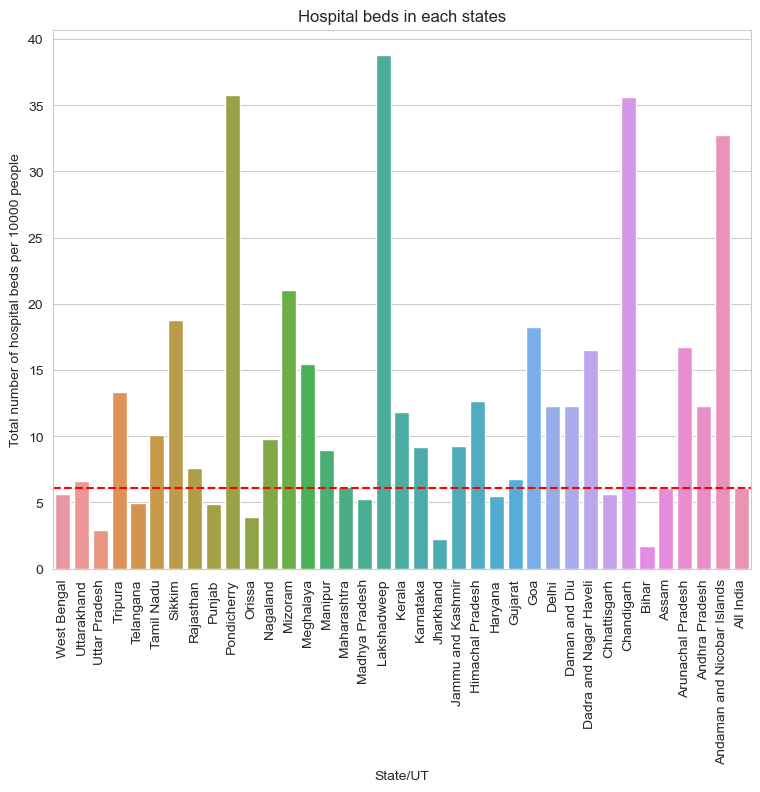

In [102]:
plt.figure(figsize=(9, 7))
sns.barplot(x='State/UT', y='Per1000', data=hospital)




# Add horizontal line at the average value of the y-axis
plt.axhline(y=average, color='r', linestyle='--')


# adding labels to the chart
plt.xlabel('State/UT')
plt.ylabel('Total number of hospital beds per 10000 people')
plt.title('Hospital beds in each states')
plt.xticks(rotation=90)
plt.show

In [103]:
copy_hospital["Required beds"]=(copy_hospital["Population"] //1000) *3

In [104]:
copy_hospital

,Unnamed: 0,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,Per1000,Required beds
0,29,West Bengal,1374,406,70,55,1905,51163,91276115,5.605300,273828
1,14,Uttarakhand,275,69,19,20,383,6660,10086292,6.603021,30258
2,32,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341,2.918238,599436
3,13,Tripura,114,22,12,9,157,4895,3673917,13.323654,11019
4,22,Telangana,788,82,47,15,932,17358,35193978,4.932094,105579
5,35,Tamil Nadu,1854,385,310,32,2581,72616,72147030,10.065002,216441
6,3,Sikkim,25,2,1,4,32,1145,610577,18.752754,1830
7,30,Rajasthan,2463,579,64,33,3139,51844,68548437,7.563119,205644
8,18,Punjab,521,146,47,28,742,13527,27743338,4.875765,83229
9,11,Pondicherry,40,4,5,4,53,4462,1247953,35.754552,3741


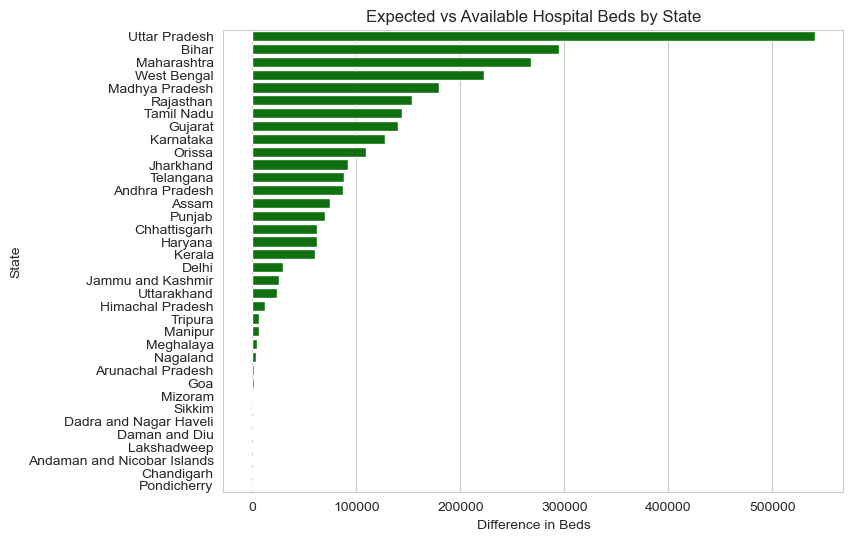

In [105]:

# calculate difference column
copy_hospital['beds_difference'] = copy_hospital['Required beds'] - copy_hospital['HospitalBeds']

# sort by difference column in descending order
copy_hospital = copy_hospital.sort_values(by='beds_difference', ascending=False)

# create horizontal bar chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='beds_difference', y='State/UT', data=copy_hospital, color='green')
plt.xlabel('Difference in Beds')
plt.ylabel('State')
plt.title('Expected vs Available Hospital Beds by State')


# set y-axis limits to include all data points
ax.set_ylim(len(copy_hospital)-0.5, -0.5)
plt.show()

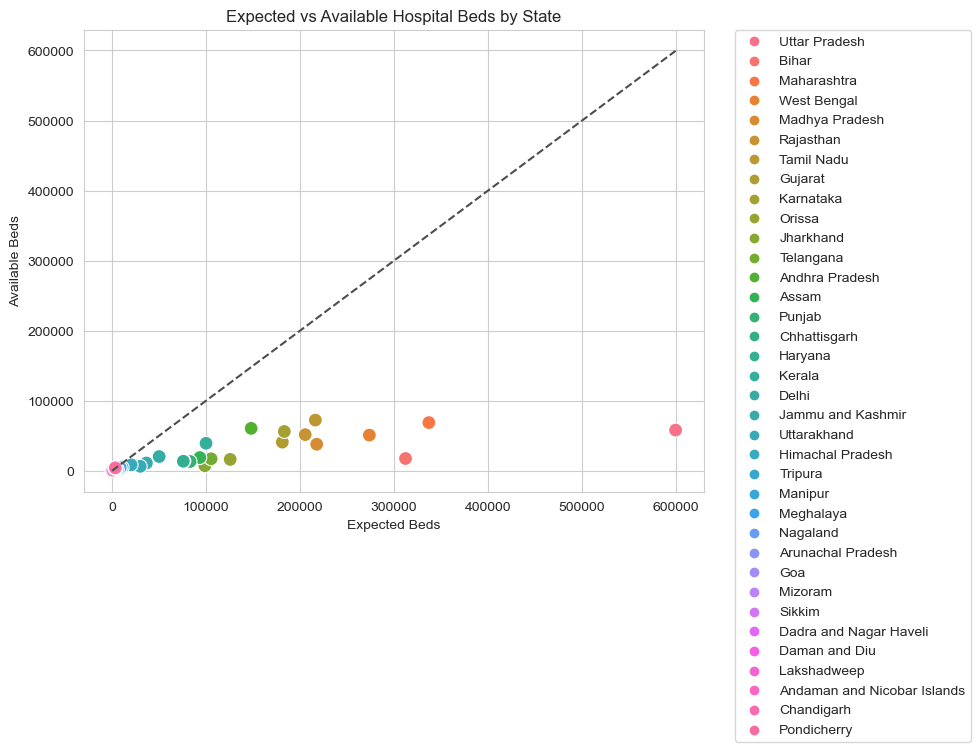

In [106]:

# create scatter plot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='Required beds', y='HospitalBeds', data=copy_hospital, hue='State/UT', s=100)
#ax = sns.relplot(kind='scatter',x='Required beds', y='HospitalBeds', data=copy_hospital, hue='State/UT', s=100)

# add diagonal line for reference
x_min = min(copy_hospital['Required beds'].min(), copy_hospital['HospitalBeds'].min())
x_max = max(copy_hospital['Required beds'].max(), copy_hospital['HospitalBeds'].max())
ax.plot([x_min, x_max], [x_min, x_max], ls="--", c=".3")

plt.xlabel('Expected Beds')
plt.ylabel('Available Beds')
plt.title('Expected vs Available Hospital Beds by State')

# shift legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()




In [109]:
copy_hospital

,Unnamed: 0,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,Per1000,Required beds,beds_difference
2,32,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341,2.918238,599436,541126
31,23,Bihar,2007,63,33,43,2146,17796,104099452,1.709519,312297,294501
15,34,Maharashtra,2638,430,101,70,3239,68998,112374333,6.140014,337122,268124
0,29,West Bengal,1374,406,70,55,1905,51163,91276115,5.605300,273828,222665
16,26,Madhya Pradesh,1420,324,72,51,1867,38140,72626809,5.251504,217878,179738
7,30,Rajasthan,2463,579,64,33,3139,51844,68548437,7.563119,205644,153800
5,35,Tamil Nadu,1854,385,310,32,2581,72616,72147030,10.065002,216441,143825
24,28,Gujarat,1770,385,44,37,2236,41129,60439692,6.804965,181317,140188
19,31,Karnataka,2547,207,147,42,2943,56333,61140305,9.213726,183420,127087
10,21,Orissa,1360,377,27,35,1799,16497,41974218,3.930270,125922,109425


In [160]:
copy_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 2 to 9
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               36 non-null     int64  
 1   State/UT                                 36 non-null     object 
 2   Number of Primary Health Centers(PHCs)   36 non-null     int32  
 3   Community Health Centers(CHCs)           36 non-null     int32  
 4   Sub-District/Divisional Hospitals(SDHs)  36 non-null     int32  
 5   District Hospitals(DHs)                  36 non-null     int32  
 6   Hospitals                                36 non-null     int32  
 7   HospitalBeds                             36 non-null     int64  
 8   Population                               36 non-null     int64  
 9   Per1000                                  36 non-null     float64
 10  Required beds                            36 non-null 

In [114]:
copy_hospital["Hospitals"]=copy_hospital["Hospitals"].astype(int)

In [159]:
copy_hospital["District Hospitals(DHs)"]=copy_hospital["District Hospitals(DHs)"].astype(int)
copy_hospital["Number of Primary Health Centers(PHCs)"]=copy_hospital["Number of Primary Health Centers(PHCs)"].astype(int)
copy_hospital["Community Health Centers(CHCs)"]=copy_hospital["Community Health Centers(CHCs)"].astype(int)
copy_hospital["Sub-District/Divisional Hospitals(SDHs)"]=copy_hospital["Sub-District/Divisional Hospitals(SDHs)"].astype(int)

In [115]:
copy_hospital["Beds per hospital"]=copy_hospital["HospitalBeds"]//copy_hospital["Hospitals"]

In [116]:
copy_hospital

,Unnamed: 0,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,Per1000,Required beds,beds_difference,Beds per hospital
2,32,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341,2.918238,599436,541126,14
31,23,Bihar,2007,63,33,43,2146,17796,104099452,1.709519,312297,294501,8
15,34,Maharashtra,2638,430,101,70,3239,68998,112374333,6.140014,337122,268124,21
0,29,West Bengal,1374,406,70,55,1905,51163,91276115,5.605300,273828,222665,26
16,26,Madhya Pradesh,1420,324,72,51,1867,38140,72626809,5.251504,217878,179738,20
7,30,Rajasthan,2463,579,64,33,3139,51844,68548437,7.563119,205644,153800,16
5,35,Tamil Nadu,1854,385,310,32,2581,72616,72147030,10.065002,216441,143825,28
24,28,Gujarat,1770,385,44,37,2236,41129,60439692,6.804965,181317,140188,18
19,31,Karnataka,2547,207,147,42,2943,56333,61140305,9.213726,183420,127087,19
10,21,Orissa,1360,377,27,35,1799,16497,41974218,3.930270,125922,109425,9


In [117]:
copy_hospital["New hospitals"]=copy_hospital["beds_difference"]//copy_hospital["Beds per hospital"]

In [127]:
copy_hospital.tail()

,Unnamed: 0,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,Per1000,Required beds,beds_difference,Beds per hospital,New hospitals
27,1,Daman and Diu,4,2,NaN,2,8,298,243247,12.250922,729,431,37,11
17,0,Lakshadweep,4,3,2,1,10,250,64473,38.775922,192,-58,25,-3
35,4,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,380581,32.739417,1140,-106,36,-3
30,10,Chandigarh,40,2,1,4,47,3756,1055450,35.586717,3165,-591,79,-8
9,11,Pondicherry,40,4,5,4,53,4462,1247953,35.754552,3741,-721,84,-9


In [121]:
copy_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 2 to 9
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               36 non-null     int64  
 1   State/UT                                 36 non-null     object 
 2   Number of Primary Health Centers(PHCs)   36 non-null     object 
 3   Community Health Centers(CHCs)           36 non-null     object 
 4   Sub-District/Divisional Hospitals(SDHs)  29 non-null     object 
 5   District Hospitals(DHs)                  36 non-null     object 
 6   Hospitals                                36 non-null     int32  
 7   HospitalBeds                             36 non-null     int64  
 8   Population                               36 non-null     int64  
 9   Per1000                                  36 non-null     float64
 10  Required beds                            36 non-null 

In [163]:
df_copy=copy_hospital.copy()

In [164]:
# Set the 'Category' column as the index
df_copy.set_index('State/UT', inplace=True)

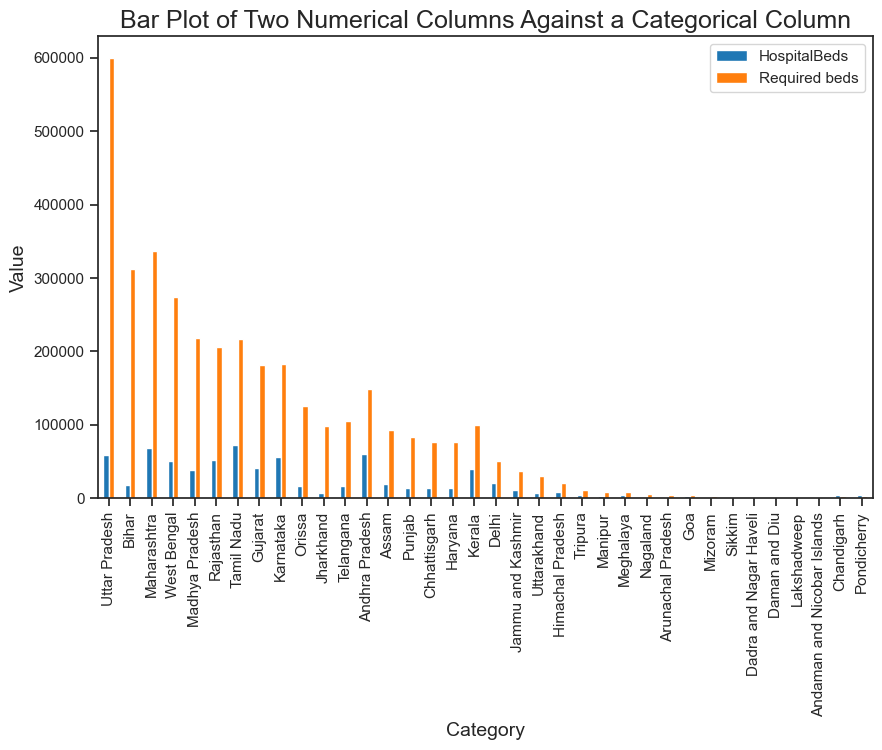

In [165]:
# Select the columns you need
cols = ['HospitalBeds', 'Required beds']



# Plot the bar chart
ax = df_copy[cols].plot(kind='bar',stacked=False, figsize=(10, 6))

        
# Set the title and axis labels
ax.set_title("Bar Plot of Two Numerical Columns Against a Categorical Column", fontsize=18)
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Value", fontsize=14)






# Show the plot
plt.show()

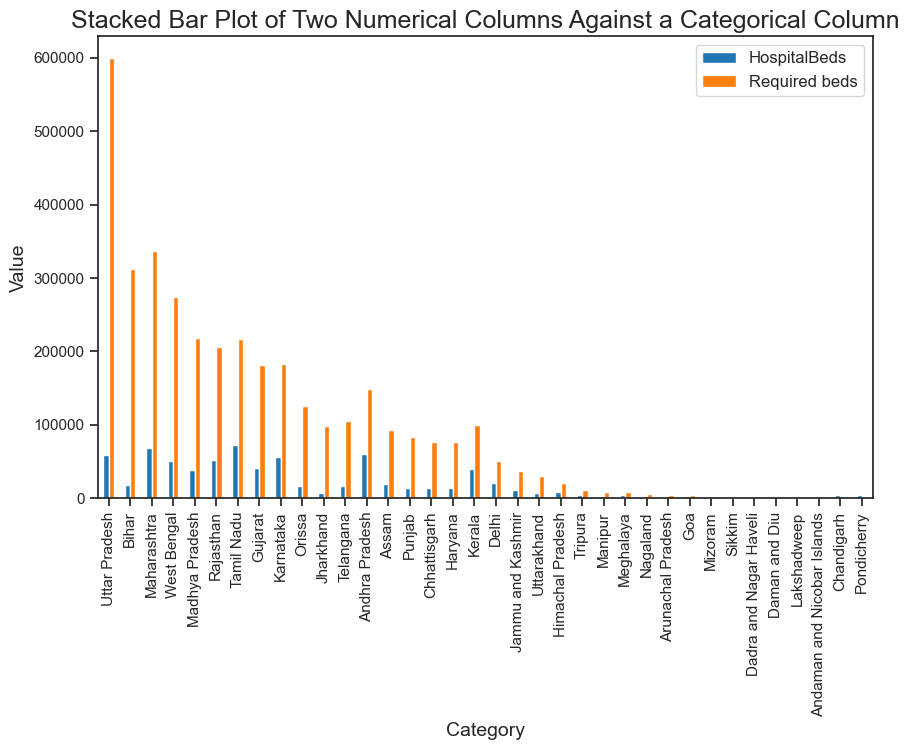

In [152]:


# Select the columns you need
cols = ['HospitalBeds', 'Required beds']

# Set the style and context
sns.set_style('ticks')
sns.set_context('notebook')

# Create the stacked bar chart
ax = df_copy[cols].plot(kind='bar', stacked=False, figsize=(10, 6), color=sns.color_palette())

# Set the title and axis labels
ax.set_title("Stacked Bar Plot of Two Numerical Columns Against a Categorical Column", fontsize=18)
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Value", fontsize=14)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


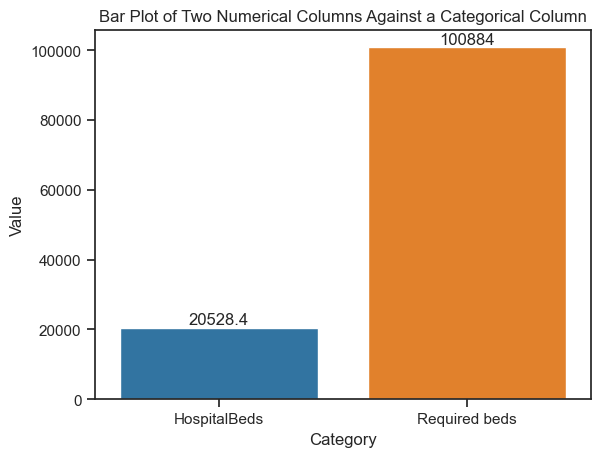

In [166]:

# Create the bar plot using Seaborn
ax = sns.barplot(data=df_copy[cols], ci=None)

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the title and axis labels
ax.set_title("Bar Plot of Two Numerical Columns Against a Categorical Column")
ax.set_xlabel("Category")
ax.set_ylabel("Value")

# Show the plot
plt.show()

In [155]:
copy_hospital.fillna(0,inplace=True)

In [157]:
copy_hospital.head()

,Unnamed: 0,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,Per1000,Required beds,beds_difference,Beds per hospital,New hospitals
2,32,Uttar Pradesh,3277,671,0,174,4122,58310,199812341,2.918238,599436,541126,14,38651
31,23,Bihar,2007,63,33,43,2146,17796,104099452,1.709519,312297,294501,8,36812
15,34,Maharashtra,2638,430,101,70,3239,68998,112374333,6.140014,337122,268124,21,12767
0,29,West Bengal,1374,406,70,55,1905,51163,91276115,5.605300,273828,222665,26,8564
16,26,Madhya Pradesh,1420,324,72,51,1867,38140,72626809,5.251504,217878,179738,20,8986


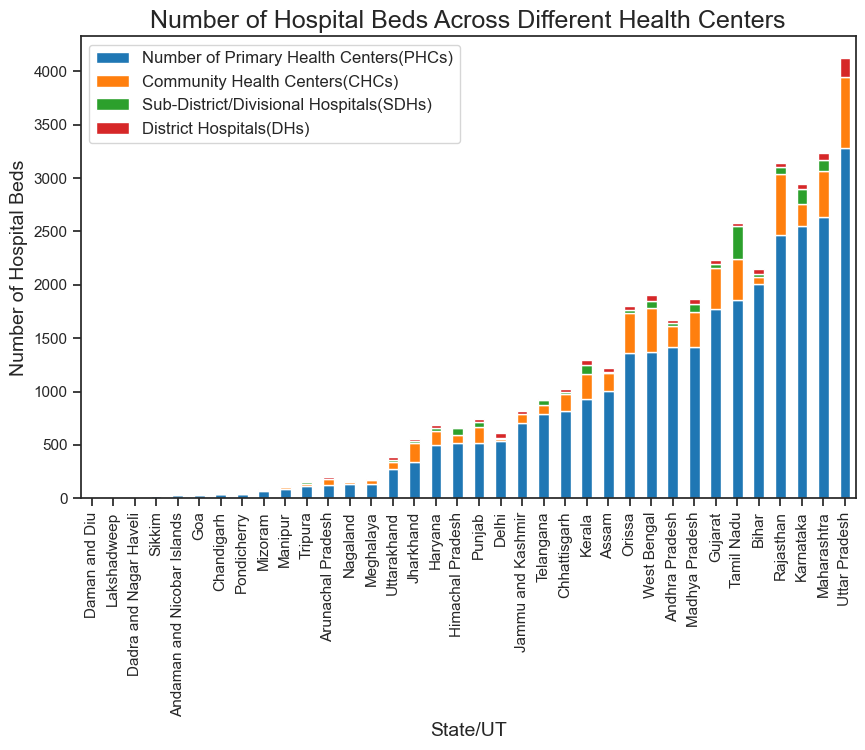

In [170]:

# Select the columns you need
cols = ['Number of Primary Health Centers(PHCs)', 'Community Health Centers(CHCs)','Sub-District/Divisional Hospitals(SDHs)','District Hospitals(DHs)']



# Sort the DataFrame by the sum of the selected columns
df_sorted = df_copy.sort_values(cols, ascending=True)


# Set the style and context
sns.set_style('ticks')
sns.set_context('notebook')

# Create the stacked bar chart
ax = df_sorted[cols].plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette())

# Set the title and axis labels
ax.set_title("Number of Hospital Beds Across Different Health Centers", fontsize=18)
ax.set_xlabel("State/UT", fontsize=14)
ax.set_ylabel("Number of Hospital Beds", fontsize=14)

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()

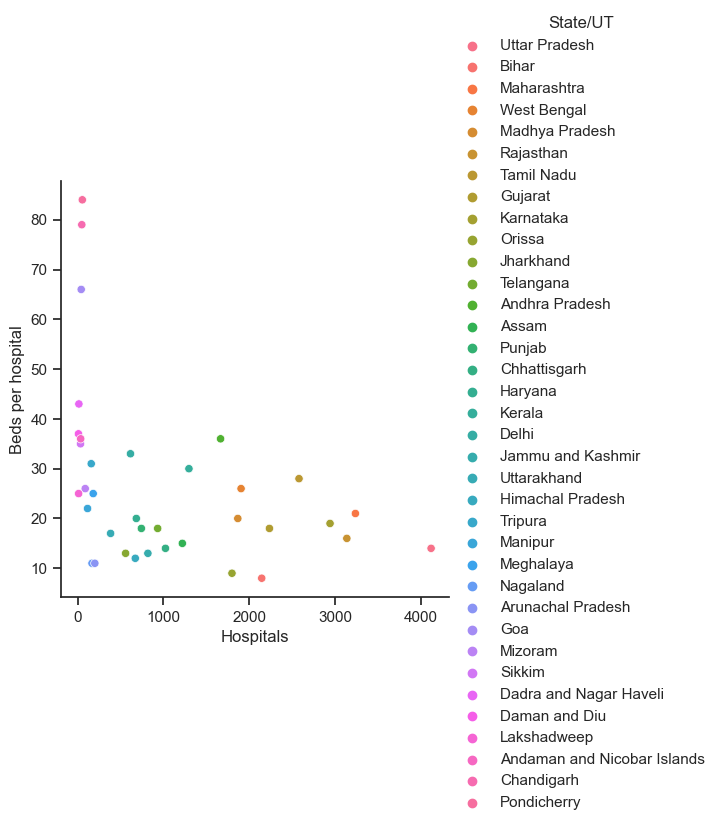

In [173]:
# scatter plot -> axes level function
# sns.scatterplot(data=df_copy, x='Hospitals', y='Beds per hospital',hue='State/UT')
sns.relplot(data=df_copy, x='Hospitals', y='Beds per hospital', kind='scatter',hue='State/UT')